In [1]:
% https://github.com/KirstieJane/NSPN_WhitakerVertes_PNAS2016 
% https://www.pnas.org/content/113/32/9105

nucleus = 'STR3_LIMBIC_tstat_CP_1mm';
n_genes = '20737';

ahba_dir = '/Users/kanaaax/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/dataframes/AHBA/ahba_data/';
chi = readtable([ahba_dir 'index/chi_index_',nucleus, '.csv']);
ahba  = readtable([ahba_dir 'index/AHBA_',n_genes,'_index_',nucleus, '.csv']);

In [2]:
genes = ahba.Properties.VariableNames;
regions = chi.Var1;

chi.Var1 = [];
ahba.Var1 = [];

ahbarr = table2array(ahba);
chiarr = table2array(chi);

X=zscore(ahbarr);
Y=zscore(chiarr);

In [3]:
size(ahbarr)
size(chiarr)


ans =

          40       20737


ans =

    40     1



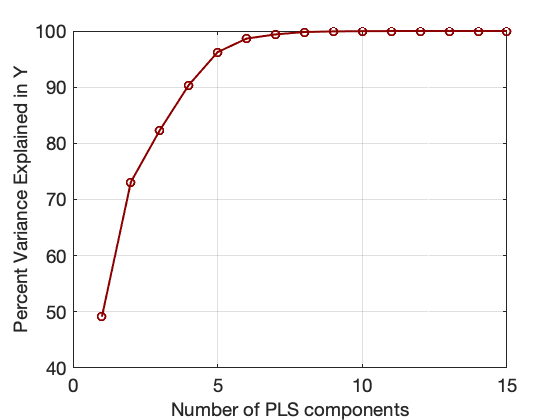

In [4]:
%perform full PLS and plot variance in Y explained by top 15 components
%typically top 2 or 3 components will explain a large part of the variance
%(hopefully!)
[XL,YL,XS,YS,BETA,PCTVAR,MSE,stats]=plsregress(X,Y);
dim=15;
plot(1:dim,cumsum(100*PCTVAR(2,1:dim)),'-o','LineWidth',1.5,'Color',[140/255,0,0]);
set(gca,'Fontsize',14)
xlabel('Number of PLS components','FontSize',14);
ylabel('Percent Variance Explained in Y','FontSize',14);
grid on


In [5]:
PCTVAR(2,1:7)


ans =

    0.4914    0.2396    0.0922    0.0804    0.0587    0.0241    0.0075



 added to session magics.


R =

    0.7010


p =

   4.7166e-07



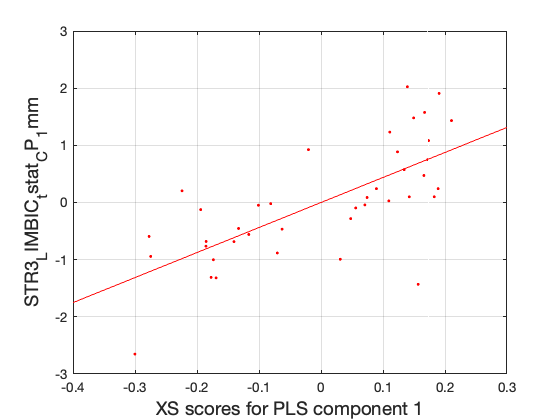

In [6]:
%%% plot correlation of PLS component 1 with t-statistic (from Cobre as an example):
figure
plot(XS(:,1),Y,'r.')
[R,p]=corr(XS(:,1),Y); 
lsline
xlabel('XS scores for PLS component 1','FontSize',14);
ylabel(nucleus,'FontSize',14);
grid on
R, p 

In [7]:
%%% plot correlation of PLS component 1 with t-statistic (from Cobre as an example):
figure
plot(XS(:,2),Y,'r.')
[R,p]=corr(XS(:,2),Y); 
lsline
xlabel('XS scores for PLS component 2','FontSize',14);
ylabel(nucleus,'FontSize',14);
grid on
R, p 

%% removed from session magics.



 added to session magics.


R =

    0.3037


p =

    0.0568



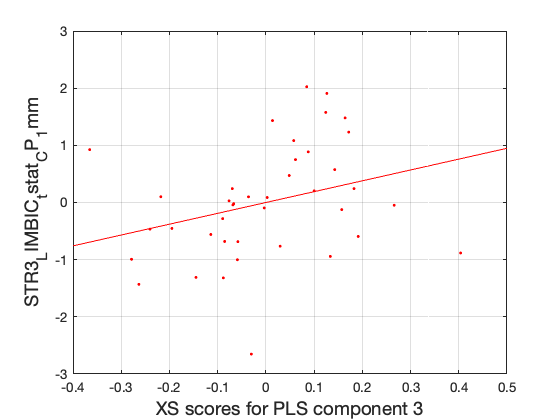

In [8]:
%%% plot correlation of PLS component 1 with t-statistic (from Cobre as an example):
figure
plot(XS(:,3),Y,'r.')
[R,p]=corr(XS(:,3),Y); 
lsline
xlabel('XS scores for PLS component 3','FontSize',14);
ylabel(nucleus,'FontSize',14);
grid on
R, p 

In [9]:
% permutation testing to assess significance of PLS result as a function of
% the number of components (dim) included:

rep=1000;
for dim=1:8
[XL,YL,XS,YS,BETA,PCTVAR,MSE,stats]=plsregress(X,Y,dim);
temp=cumsum(100*PCTVAR(2,1:dim));
Rsquared = temp(dim);
    for j=1:rep
        %j
        order=randperm(size(Y,1));
        Yp=Y(order,:);

        [XL,YL,XS,YS,BETA,PCTVAR,MSE,stats]=plsregress(X,Yp,dim);

        temp=cumsum(100*PCTVAR(2,1:dim));
        Rsq(j) = temp(dim);
    end
dim
R(dim)=Rsquared
p(dim)=length(find(Rsq>=Rsquared))/rep
end



dim =

     1


R =

   49.1423


p =

    0.0380


dim =

     2


R =

   49.1423   73.1036


p =

    0.0380    0.0220


dim =

     3


R =

   49.1423   73.1036   82.3263


p =

    0.0380    0.0220    0.1840


dim =

     4


R =

   49.1423   73.1036   82.3263   90.3686


p =

    0.0380    0.0220    0.1840    0.2540


dim =

     5


R =

   49.1423   73.1036   82.3263   90.3686   96.2425


p =

    0.0380    0.0220    0.1840    0.2540    0.1220


dim =

     6


R =

   49.1423   73.1036   82.3263   90.3686   96.2425   98.6496


p =

    0.0380    0.0220    0.1840    0.2540    0.1220    0.0500


dim =

     7


R =

   49.1423   73.1036   82.3263   90.3686   96.2425   98.6496   99.3955


p =

    0.0380    0.0220    0.1840    0.2540    0.1220    0.0500    0.1280


dim =

     8


R =

  Columns 1 through 7

   49.1423   73.1036   82.3263   90.3686   96.2425   98.6496   99.3955

  Column 8

   99.8174


p =

  Columns 1 through 7

    0.0380    0.0220    0.1840    0.2540    0.

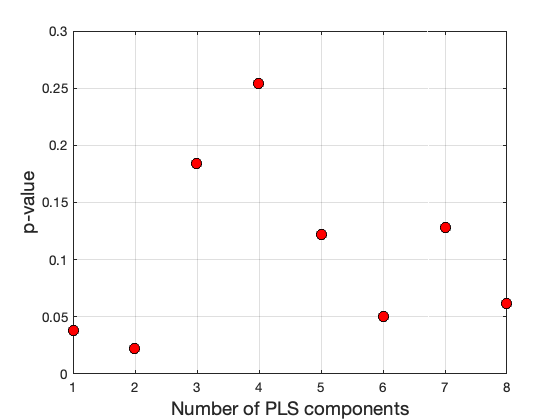

In [10]:
%figure
plot(1:dim, p,'ok','MarkerSize',8,'MarkerFaceColor','r');
xlabel('Number of PLS components','FontSize',14);
ylabel('p-value','FontSize',14);
grid on

In [11]:
geneindex=1:length(genes);

%number of bootstrap iterations:
bootnum=1000;

%DO PLS in 2 dimensions (with 2 components)
%ahbarr = table2array(ahba);
%chiarr = table2array(chi);
%X=zscore(ahbarr);
%Y=zscore(chiarr);

dim=2;
[XL,YL,XS,YS,BETA,PCTVAR,MSE,stats]=plsregress(X,Y,dim);


%store regions IDs and weights in descending order of weight for both
%components
[R1,p1]=corr([XS(:,1),XS(:,2)],Y);

%align PLS components with desired direction for interpretability 
if R1(1,1)<0  %this is specific to the data shape we were using - will need ammending
    stats.W(:,1)=-1*stats.W(:,1);
    XS(:,1)=-1*XS(:,1);
end
if R1(2,1)<0 %this is specific to the data shape we were using - will need ammending
    stats.W(:,2)=-1*stats.W(:,2);
    XS(:,2)=-1*XS(:,2);
end

[PLS1w,x1] = sort(stats.W(:,1),'descend');
PLS1ids=genes(x1);
geneindex1=geneindex(x1);
[PLS2w,x2] = sort(stats.W(:,2),'descend');
PLS2ids=genes(x2);
geneindex2=geneindex(x2);


In [12]:

%print out results
csvwrite([ahba_dir 'stats/PLS1_scores_ahba',n_genes,'_chi_', nucleus ,'.csv'],XS(:,1));
csvwrite([ahba_dir 'stats/PLS2_scores_ahba',n_genes,'_chi_', nucleus ,'.csv'],XS(:,2));


In [13]:
%define variables for storing the (ordered) weights from all bootstrap runs
PLS1weights=[];
PLS2weights=[];
PLS3weights=[];

%start bootstrap
disp('  Bootstrapping - could take a while')
for i=1:bootnum
    myresample = randsample(size(X,1),size(X,1),1);
    res(i,:)=myresample; %store resampling out of interest
    Xr=X(myresample,:); % define X for resampled regions
    Yr=Y(myresample,:); % define Y for resampled regions
    [XL,YL,XS,YS,BETA,PCTVAR,MSE,stats]=plsregress(Xr,Yr,dim); %perform PLS for resampled data

    temp=stats.W(:,1);%extract PLS1 weights
    newW=temp(x1); %order the newly obtained weights the same way as initial PLS
    if corr(PLS1w,newW)<0 % the sign of PLS components is arbitrary - make sure this aligns between runs
        newW=-1*newW;
    end
    PLS1weights=[PLS1weights,newW];%store (ordered) weights from this bootstrap run

    temp=stats.W(:,2);%extract PLS2 weights
    newW=temp(x2); %order the newly obtained weights the same way as initial PLS
    if corr(PLS2w,newW)<0 % the sign of PLS components is arbitrary - make sure this aligns between runs
        newW=-1*newW;
    end
    PLS2weights=[PLS2weights,newW]; %store (ordered) weights from this bootstrap run
    

end


  Bootstrapping - could take a while


In [14]:
%get standard deviation of weights from bootstrap runs
PLS1sw=std(PLS1weights');
PLS2sw=std(PLS2weights');

%get bootstrap weights
temp1=PLS1w./PLS1sw';
temp2=PLS2w./PLS2sw';


In [15]:
%order bootstrap weights (Z) and names of regions
[Z1 ind1]=sort(temp1,'descend');
PLS1=PLS1ids(ind1);
geneindex1=geneindex1(ind1);
[Z2 ind2]=sort(temp2,'descend');
PLS2=PLS2ids(ind2);
geneindex2=geneindex2(ind2);
[Z3 ind3]=sort(temp3,'descend');


Error using eval
Undefined function or variable 'temp3'.



In [16]:


%print out results
% later use first column of these csv files for pasting into GOrilla (for
% bootstrapped ordered list of genes) 
fid1 = fopen([ahba_dir 'stats/PLS1_weights_ahba',n_genes,'_chi_', nucleus ,'.csv'],'w')
for i=1:length(genes)-1
  fprintf(fid1,'%s, %d, %f\n', PLS1{i}, geneindex1(i), Z1(i));
end
fclose(fid1)

fid2 = fopen([ahba_dir 'stats/PLS2_weights_ahba',n_genes,'_chi_', nucleus ,'.csv'],'w')
for i=1:length(genes)-1
  fprintf(fid2,'%s, %d, %f\n', PLS2{i},geneindex2(i), Z2(i));
end
fclose(fid2)



fid1 =

     3


ans =

     0


fid2 =

     3


ans =

     0




ans =

   -4.4170



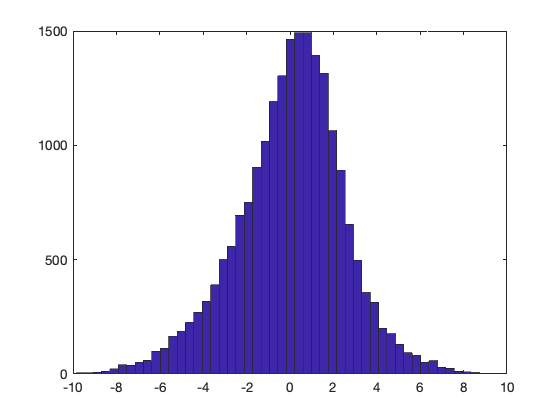

In [17]:
nbins = 50;
hist(Z1,nbins)
prctile(Z1,5)

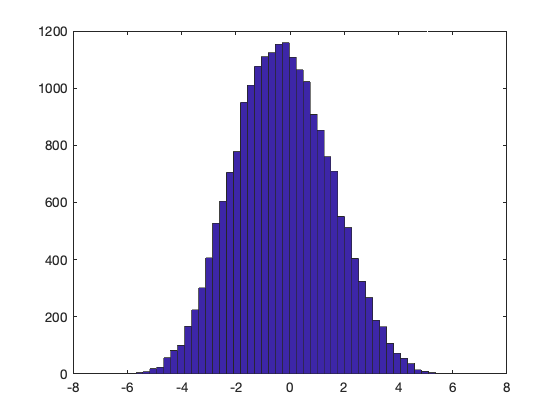

In [18]:
nbins = 50;
hist(Z2,nbins)